In [18]:
import os
import numpy as np

In [19]:
def load_npz_data(folder_path):
    oct_images, slo_images, glaucoma_labels, race_labels = [], [], [], []
    
    for file in os.listdir(folder_path):
        if file.endswith(".npz"):
            data = np.load(os.path.join(folder_path, file))
            
            oct_image = np.repeat(data['oct_fundus'][:, :, np.newaxis], 3, axis=-1)
            slo_image = np.repeat(data['slo_fundus'][:, :, np.newaxis], 3, axis=-1)
            glaucoma_label = data['glaucoma']
            race_label = data['race']
            
            # Append the image data and labels
            oct_images.append(oct_image)
            slo_images.append(slo_image)
            glaucoma_labels.append(glaucoma_label)
            race_labels.append(race_label)
    
    oct_images = np.array(oct_images) / 255.0  # Normalize image data
    slo_images = np.array(slo_images) / 255.0  # Normalize image data
    glaucoma_labels = np.expand_dims(np.array(glaucoma_labels), axis=-1)  # Shape (num_samples, 1)
    race_labels = np.expand_dims(np.array(race_labels), axis=-1)  # Shape (num_samples, 1)
    
    # Return image data, labels, and race labels
    return oct_images, slo_images, glaucoma_labels, race_labels

In [20]:
# Load training and testing data, including race
train_oct, train_slo, train_glaucoma_labels, train_race_lables = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Training')
test_oct, test_slo, test_glaucoma_labels, test_race_labels = load_npz_data('C:\\Rakshya\\ULL\\First Semester\\Data Mining\\fairdomain-20241031T021302Z-001\\fairdomain\\Testing')


In [23]:
print("Train OCT Images shape: ", train_oct.shape)
print("Train SLO Images shape: ", train_slo.shape)
print("Train Glaucoma Labels: ", train_glaucoma_labels.shape)
print("Train race labels: ",train_race_lables.shape)
print("Test OCT Images shape: ", test_oct.shape)
print("Test SLO Images shape: ", test_slo.shape)
print("Test Glaucoma Labels: ", test_glaucoma_labels.shape)
print("Test race labels: ",test_race_labels.shape)


Train OCT Images shape:  (3000, 224, 224, 3)
Train SLO Images shape:  (3000, 224, 224, 3)
Train Glaucoma Labels:  (3000, 1)
Train race labels:  (3000, 1)
Test OCT Images shape:  (2000, 224, 224, 3)
Test SLO Images shape:  (2000, 224, 224, 3)
Test Glaucoma Labels:  (2000, 1)
Test race labels:  (2000, 1)


In [56]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Concatenate, Dropout
from tensorflow.keras.models import Model

In [57]:
# OCT Input
input_oct = Input(shape=(224, 224, 3), name='oct_input')
base_resnet_oct = ResNet50(include_top=False, weights='imagenet', input_tensor=input_oct)
base_resnet_oct.trainable = False  # Freeze the ResNet weights
for layer in base_resnet_oct.layers:
    layer.name = layer.name + "_oct"
    print(layer.name)
x1 = GlobalAveragePooling2D()(base_resnet_oct.output)

oct_input_oct
conv1_pad_oct
conv1_conv_oct
conv1_bn_oct
conv1_relu_oct
pool1_pad_oct
pool1_pool_oct
conv2_block1_1_conv_oct
conv2_block1_1_bn_oct
conv2_block1_1_relu_oct
conv2_block1_2_conv_oct
conv2_block1_2_bn_oct
conv2_block1_2_relu_oct
conv2_block1_0_conv_oct
conv2_block1_3_conv_oct
conv2_block1_0_bn_oct
conv2_block1_3_bn_oct
conv2_block1_add_oct
conv2_block1_out_oct
conv2_block2_1_conv_oct
conv2_block2_1_bn_oct
conv2_block2_1_relu_oct
conv2_block2_2_conv_oct
conv2_block2_2_bn_oct
conv2_block2_2_relu_oct
conv2_block2_3_conv_oct
conv2_block2_3_bn_oct
conv2_block2_add_oct
conv2_block2_out_oct
conv2_block3_1_conv_oct
conv2_block3_1_bn_oct
conv2_block3_1_relu_oct
conv2_block3_2_conv_oct
conv2_block3_2_bn_oct
conv2_block3_2_relu_oct
conv2_block3_3_conv_oct
conv2_block3_3_bn_oct
conv2_block3_add_oct
conv2_block3_out_oct
conv3_block1_1_conv_oct
conv3_block1_1_bn_oct
conv3_block1_1_relu_oct
conv3_block1_2_conv_oct
conv3_block1_2_bn_oct
conv3_block1_2_relu_oct
conv3_block1_0_conv_oct
conv3_

In [58]:
# SLO Input
input_slo = Input(shape=(224, 224, 3), name='slo_input')
base_resnet_slo = ResNet50(include_top=False, weights='imagenet', input_tensor=input_slo)
base_resnet_slo.trainable = False  # Freeze the ResNet weights
for layer in base_resnet_slo.layers:
    layer.name = layer.name + "_slo"
    print(layer.name)
x2 = GlobalAveragePooling2D()(base_resnet_slo.output)

slo_input_slo
conv1_pad_slo
conv1_conv_slo
conv1_bn_slo
conv1_relu_slo
pool1_pad_slo
pool1_pool_slo
conv2_block1_1_conv_slo
conv2_block1_1_bn_slo
conv2_block1_1_relu_slo
conv2_block1_2_conv_slo
conv2_block1_2_bn_slo
conv2_block1_2_relu_slo
conv2_block1_0_conv_slo
conv2_block1_3_conv_slo
conv2_block1_0_bn_slo
conv2_block1_3_bn_slo
conv2_block1_add_slo
conv2_block1_out_slo
conv2_block2_1_conv_slo
conv2_block2_1_bn_slo
conv2_block2_1_relu_slo
conv2_block2_2_conv_slo
conv2_block2_2_bn_slo
conv2_block2_2_relu_slo
conv2_block2_3_conv_slo
conv2_block2_3_bn_slo
conv2_block2_add_slo
conv2_block2_out_slo
conv2_block3_1_conv_slo
conv2_block3_1_bn_slo
conv2_block3_1_relu_slo
conv2_block3_2_conv_slo
conv2_block3_2_bn_slo
conv2_block3_2_relu_slo
conv2_block3_3_conv_slo
conv2_block3_3_bn_slo
conv2_block3_add_slo
conv2_block3_out_slo
conv3_block1_1_conv_slo
conv3_block1_1_bn_slo
conv3_block1_1_relu_slo
conv3_block1_2_conv_slo
conv3_block1_2_bn_slo
conv3_block1_2_relu_slo
conv3_block1_0_conv_slo
conv3_

In [59]:
# Combine the outputs of both branches
combined = Concatenate()([x1, x2])
x = Dense(256, activation='relu')(combined)
x = Dropout(0.5)(x)

In [60]:
# Glaucoma Output (binary classification)
output = Dense(1, activation='sigmoid', name='glaucoma_output')(x)

In [61]:
model = Model(inputs=[input_oct, input_slo], outputs=output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [62]:
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ oct_input_oct       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ slo_input_slo       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_oct       │ (None, 230, 230,  │          0 │ oct_input_oct[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad_slo       │ (None, 230, 230,  │          0 │ slo_input_slo[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_oct      │ (None, 112, 112,  │      9,472 │ conv1_pad_oct[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv_slo      │ (None, 112, 112,  │      9,472 │ conv1_pad_slo[0]… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_oct        │ (None, 112, 112,  │        256 │ conv1_conv_oct[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn_slo        │ (None, 112, 112,  │        256 │ conv1_conv_slo[0… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_oct      │ (None, 112, 112,  │          0 │ conv1_bn_oct[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu_slo      │ (None, 112, 112,  │          0 │ conv1_bn_slo[0][… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_oct       │ (None, 114, 114,  │          0 │ conv1_relu_oct[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad_slo       │ (None, 114, 114,  │          0 │ conv1_relu_slo[0… │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_oct      │ (None, 56, 56,    │          0 │ pool1_pad_oct[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool_slo      │ (None, 56, 56,    │          0 │ pool1_pad_slo[0]… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_oct[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_con… │ (None, 56, 56,    │      4,160 │ pool1_pool_slo[0… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn_… │ (None, 56, 56,    │        256 │ conv2_block1_1_c

 Total params: 48,224,513 (183.96 MB)

 Trainable params: 1,049,089 (4.00 MB)

 Non-trainable params: 47,175,424 (179.96 MB)

In [63]:
history = model.fit(
    [train_oct, train_slo],
    train_glaucoma_labels,
    validation_data=([test_oct, test_slo], test_glaucoma_labels),
    epochs=10,
    batch_size=32
)

Epoch 1/10


c:\Users\Rakshya\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: ['oct_input', 'slo_input']. Received: the structure of inputs=('*', '*')
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.5016 - loss: 0.9158 - val_accuracy: 0.5375 - val_loss: 0.6887
Epoch 2/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5463 - loss: 0.6872 - val_accuracy: 0.5565 - val_loss: 0.6806
Epoch 3/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.5572 - loss: 0.6841 - val_accuracy: 0.5565 - val_loss: 0.6824
Epoch 4/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 211s 2s/step - accuracy: 0.5599 - loss: 0.6807 - val_accuracy: 0.5565 - val_loss: 0.6848
Epoch 5/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 229s 2s/step - accuracy: 0.5422 - loss: 0.6841 - val_accuracy: 0.5565 - val_loss: 0.6784
Epoch 6/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.5463 - loss: 0.6843 - val_accuracy: 0.5565 - val_loss: 0.6792
Epoch 7/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 235s 3s/step - accuracy: 0.5665 - loss: 0.6769 - val_accuracy: 0.5565 - val_loss: 0.6781
Epoch 8/10
94/94 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.5738 - loss: 0.6731 - val_accuracy: 0.5565 - val_loss: 0.

In [64]:
history2 = model.fit(
    [train_oct, train_slo],            # Training data
    train_glaucoma_labels,             # Labels
    validation_data=([test_oct, test_slo], test_glaucoma_labels),  
    epochs=15,                         # Additional epochs
    batch_size=32                      # Batch size
)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.5475 - loss: 0.6766 - val_accuracy: 0.5565 - val_loss: 0.6769
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.5606 - loss: 0.6781 - val_accuracy: 0.5565 - val_loss: 0.6810
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 216s 2s/step - accuracy: 0.5674 - loss: 0.6782 - val_accuracy: 0.5565 - val_loss: 0.6722
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 215s 2s/step - accuracy: 0.5686 - loss: 0.6685 - val_accuracy: 0.5565 - val_loss: 0.6765
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - accuracy: 0.5500 - loss: 0.6741 - val_accuracy: 0.5565 - val_loss: 0.6780
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 223s 2s/step - accuracy: 0.5443 - loss: 0.6845 - val_accuracy: 0.5565 - val_loss: 0.6733
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.5648 - loss: 0.6708 - val_accuracy: 0.5565 - val_loss: 0.6759
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 225s 2s/step - accuracy: 0.5620 - loss: 0.6751 - val_accuracy: 0.5565 - v

In [68]:
test_loss, test_accuracy = model.evaluate([test_oct, test_slo], test_glaucoma_labels)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

63/63 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5519 - loss: 0.6771
Test Accuracy: 0.5565000176429749
Test Loss: 0.6731639504432678


In [69]:
train_loss, train_accuracy = model.evaluate([train_oct, train_slo], train_glaucoma_labels)
print(f'Train Accuracy: {test_accuracy}')
print(f'Train Loss: {test_loss}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5665 - loss: 0.6643
Train Accuracy: 0.5565000176429749
Train Loss: 0.6731639504432678


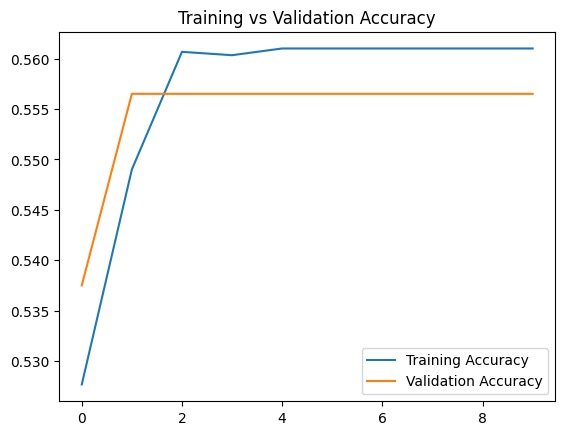

In [67]:
import matplotlib.pyplot as plt

# Assuming you have training history from model.fit()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()